In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.classification import *

# **SELECTION OF TRAINING AND VALIDATION DATA SETS**

In [ ]:
df = pd.read_csv("/content/Flaviviridae_dataset.csv", delimiter = ";")

In [ ]:
train_data = df[df["Set"] == "t"]
val_data = df[df["Set"] == "v"]

x_train = train_data.iloc[:, 2:]
y_train = train_data.iloc[:, 0]
x_val = val_data.iloc[:, 2:]
y_val = val_data.iloc[:, 0]

train_data = pd.concat([y_train, x_train], axis = 1)
val_data = pd.concat([y_val, x_val], axis = 1)

clf_setup_train = setup(data = train_data, test_data = val_data, target = "f(vij)obs", session_id = 123, n_jobs = -1)

,Description,Value
0,Session id,123
1,Target,f(vij)obs
2,Target type,Binary
3,Original data shape,"(46517, 212)"
4,Transformed data shape,"(46517, 212)"
5,Transformed train set shape,"(34888, 212)"
6,Transformed test set shape,"(11629, 212)"
7,Numeric features,211
8,Preprocess,True
9,Imputation type,simple


# **COMPARISON AND SELECTION OF THE BEST MODEL**

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7843,0.8910,0.7486,0.7606,0.7490,0.5607,0.5675,16.1920
xgboost,Extreme Gradient Boosting,0.7831,0.8859,0.7487,0.7589,0.7486,0.5586,0.5650,4.8070
ridge,Ridge Classifier,0.7829,0.0000,0.6934,0.7851,0.7285,0.5520,0.5609,0.8070
lda,Linear Discriminant Analysis,0.7821,0.8722,0.6970,0.7812,0.7290,0.5509,0.5592,2.5430
gbc,Gradient Boosting Classifier,0.7810,0.8820,0.7127,0.7724,0.7329,0.5503,0.5593,54.7250
ada,Ada Boost Classifier,0.7739,0.8677,0.6907,0.7710,0.7201,0.5344,0.5438,10.8800
lr,Logistic Regression,0.7714,0.8549,0.7010,0.7611,0.7237,0.5311,0.5380,15.8420
rf,Random Forest Classifier,0.7699,0.8524,0.7243,0.7486,0.7314,0.5311,0.5366,15.5760
dt,Decision Tree Classifier,0.7659,0.8118,0.7156,0.7475,0.7257,0.5226,0.5288,3.3750
et,Extra Trees Classifier,0.7650,0.8326,0.7063,0.7494,0.7220,0.5199,0.5257,12.5860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
model_name = f"base_model_{best_model.__class__.__name__}"
save_model(best_model, model_name )

# **LOAD AND EVALUATE MODEL**

In [ ]:
model = load_model('base_model_LGBMClassifier')

In [ ]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **TUNE THE MODEL**

In [ ]:
tuned_model_10f = tune_model(model, fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6523,0.7703,0.3948,0.6900,0.5023,0.2644,0.2887
1,0.7759,0.8819,0.7277,0.7581,0.7426,0.5443,0.5446
2,0.7561,0.8697,0.6084,0.7944,0.6891,0.4942,0.5061
3,0.7538,0.8559,0.6806,0.7435,0.7107,0.4971,0.4986
4,0.7873,0.8807,0.7006,0.7962,0.7454,0.5641,0.5675
5,0.7409,0.8673,0.6045,0.7630,0.6746,0.4641,0.4728
6,0.7661,0.8729,0.6084,0.8186,0.6980,0.5138,0.5289
7,0.8621,0.9498,0.8974,0.8120,0.8526,0.7237,0.7269
8,0.9037,0.9660,0.9271,0.8657,0.8953,0.8063,0.8079


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_model_5f = tune_model(model, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7343,0.8292,0.5806,0.7647,0.6601,0.4486,0.4601
1,0.7610,0.8605,0.6545,0.7727,0.7087,0.5084,0.5134
2,0.7637,0.8741,0.6587,0.7755,0.7124,0.5141,0.5190
3,0.7938,0.9009,0.8003,0.7516,0.7752,0.5850,0.5860
4,0.8469,0.9541,0.9416,0.7669,0.8454,0.6969,0.7113
Mean,0.7799,0.8838,0.7272,0.7663,0.7403,0.5506,0.5580
Std,0.0384,0.0421,0.1287,0.0083,0.0640,0.0850,0.0865


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **PREDICTIONS WITH THE FINAL MODEL**

In [ ]:
predict_model(model, data = train_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8485,0.9384,0.8175,0.8376,0.8274,0.6924,0.6926


,f(vij)ref,D1C1,D1C2,D1C3,D1C4,D1C5,D1C6,D2C1,D2C2,D2C3,...,D34C6,D35C1,D35C2,D35C3,D35C4,D35C5,D35C6,f(vij)obs,prediction_label,prediction_score
0,1.00,-218.544998,-209.001007,-206.772003,-96.514999,-143.518005,-96.522003,-78.153000,-75.085999,-74.415001,...,51.944,-65.296997,-63.384998,-62.978001,-39.071999,-48.319000,-39.112999,1,1,0.9976
1,0.31,-10.820000,2.769000,25.709999,-12.515000,-59.518002,-12.522000,-5.633000,-283.286011,7.898000,...,54.944,-29.813000,-28.174999,-21.261000,-32.071999,-41.319000,-32.112999,0,0,0.9578
2,1.00,-266.545013,-257.001007,-254.772003,-144.514999,-191.518005,-144.522003,-91.347000,-454.493011,-87.609001,...,41.944,-70.296997,-68.385002,-67.977997,-44.071999,-53.319000,-44.112999,1,1,0.9981
4,0.31,-52.390999,-58.041000,-56.000000,-216.514999,-45.827999,-216.522003,-21.650999,-210.785004,-21.327999,...,27.944,-25.254000,-26.215000,-25.000000,-50.071999,-22.882999,-50.112999,0,0,0.9658
5,0.31,601.179993,614.768982,643.382019,599.484985,552.481995,599.478027,200.460999,-77.192001,211.848007,...,193.944,19.187000,20.825001,24.643999,16.927999,7.681000,16.886999,0,0,0.5796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46510,0.90,211.145996,218.768997,0.000000,203.485001,156.481995,203.477997,69.435997,-211.126999,0.000000,...,123.944,-11.542000,-10.175000,-70.000000,-14.072000,-23.319000,-14.113000,1,1,0.9649
46512,0.90,211.145996,218.768997,0.000000,203.485001,156.481995,203.477997,69.435997,-211.126999,0.000000,...,123.944,-11.542000,-10.175000,-70.000000,-14.072000,-23.319000,-14.113000,1,1,0.9649
46513,0.90,211.145996,218.768997,0.000000,203.485001,156.481995,203.477997,69.435997,-211.126999,0.000000,...,123.944,-11.542000,-10.175000,-70.000000,-14.072000,-23.319000,-14.113000,1,1,0.9649
46514,0.90,77.538002,73.941002,102.778999,9.818000,-71.517998,-24.521999,47.105999,-191.255005,53.952999,...,69.944,-8.000000,-9.051000,-4.582000,-34.909000,-43.319000,-34.112999,1,1,0.9647


In [ ]:
predict_model(model, data = val_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8291,0.9221,0.7906,0.8189,0.8045,0.6528,0.6532


,f(vij)ref,D1C1,D1C2,D1C3,D1C4,D1C5,D1C6,D2C1,D2C2,D2C3,...,D34C6,D35C1,D35C2,D35C3,D35C4,D35C5,D35C6,f(vij)obs,prediction_label,prediction_score
3,1.00,477.454987,486.998993,489.227997,599.484985,552.481995,599.478027,158.184006,-204.962006,161.921997,...,193.944,-9.297000,-7.385000,-6.978000,16.927999,7.681,16.886999,1,1,0.9975
7,0.31,241.179993,254.768997,232.858002,239.485001,192.481995,239.477997,78.342003,-199.311005,76.660004,...,112.944,-9.813000,-8.175000,-10.036000,-12.072000,-21.319,-12.113000,0,0,0.9078
11,0.26,56.320000,654.226990,651.588013,464.446991,552.481995,599.478027,19.136000,-37.734001,216.925003,...,193.944,-98.559998,27.381001,26.357000,-9.845000,7.681,16.886999,0,0,0.9239
15,0.31,601.179993,614.768982,643.382019,599.484985,552.481995,599.478027,200.460999,-77.192001,211.848007,...,193.944,19.187000,20.825001,24.643999,16.927999,7.681,16.886999,0,0,0.5796
19,0.13,56.632999,56.632999,56.921001,-132.514999,58.393002,-132.522003,6.586000,-163.690002,6.640000,...,30.944,-9.753000,-9.753000,-9.717000,-48.071999,-10.350,-48.112999,0,0,0.6839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46499,0.90,211.145996,218.768997,0.000000,203.485001,156.481995,203.477997,69.435997,-211.126999,0.000000,...,123.944,-11.542000,-10.175000,-70.000000,-14.072000,-23.319,-14.113000,1,1,0.9649
46503,0.90,211.145996,218.768997,0.000000,203.485001,156.481995,203.477997,69.435997,-211.126999,0.000000,...,123.944,-11.542000,-10.175000,-70.000000,-14.072000,-23.319,-14.113000,1,1,0.9649
46507,0.90,211.145996,218.768997,0.000000,203.485001,156.481995,203.477997,69.435997,-211.126999,0.000000,...,123.944,-11.542000,-10.175000,-70.000000,-14.072000,-23.319,-14.113000,1,1,0.9649
46511,0.90,211.145996,218.768997,0.000000,203.485001,156.481995,203.477997,69.435997,-211.126999,0.000000,...,123.944,-11.542000,-10.175000,-70.000000,-14.072000,-23.319,-14.113000,1,1,0.9649


# **PLOTS OF THE MODEL**

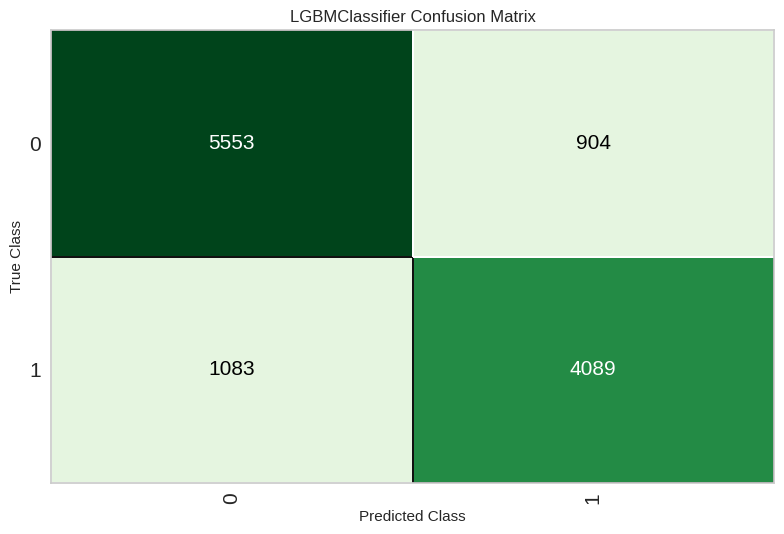

In [ ]:
plot_model(model, "confusion_matrix")

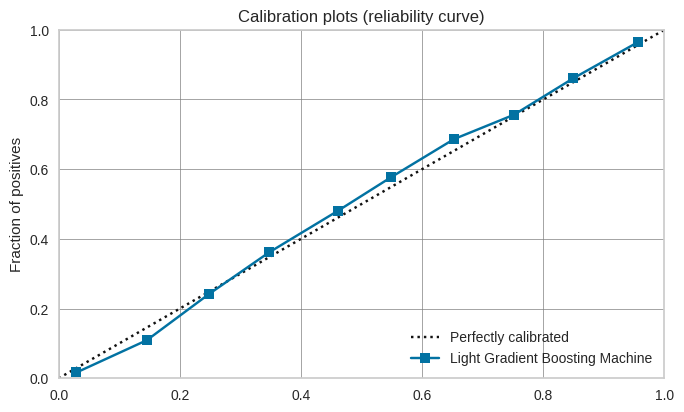

In [ ]:
plot_model(model, "calibration")

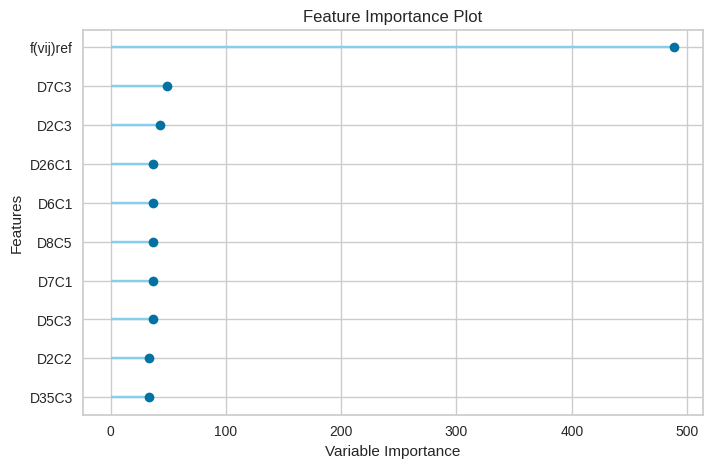

In [ ]:
plot_model(model, "feature")